# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
temp_units = "Metric"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

# Output File (CSV)
output_data_file = "Resources/weather_df.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_list = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_list.append(city)
        else:
            count_one += 1
            city_list.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
        print("--------------------------------------------------------")
    except Exception:
        print("City not found.... Searching...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | auki
--------------------------------------------------------
Processing Record 2 of Set 1 | puerto ayora
--------------------------------------------------------
Processing Record 3 of Set 1 | atuona
--------------------------------------------------------
City not found.... Searching...
Processing Record 4 of Set 1 | katsuura
--------------------------------------------------------
Processing Record 5 of Set 1 | port alfred
--------------------------------------------------------
Processing Record 6 of Set 1 | hilo
--------------------------------------------------------
Processing Record 7 of Set 1 | karratha
--------------------------------------------------------
Processing Record 8 of Set 1 | qaanaaq
--------------------------------------------------------
Processing Record 9 of Set 1 | otavi
--------------------------------------------------------
Processing Record 10 of Set 1 | boca do acre
--------------------------------------------------------


Processing Record 31 of Set 2 | ola
--------------------------------------------------------
Processing Record 32 of Set 2 | awbari
--------------------------------------------------------
Processing Record 33 of Set 2 | kodiak
--------------------------------------------------------
Processing Record 34 of Set 2 | puerto madero
--------------------------------------------------------
Processing Record 35 of Set 2 | mafeteng
--------------------------------------------------------
Processing Record 36 of Set 2 | castro
--------------------------------------------------------
City not found.... Searching...
Processing Record 37 of Set 2 | liverpool
--------------------------------------------------------
Processing Record 38 of Set 2 | kendari
--------------------------------------------------------
City not found.... Searching...
Processing Record 39 of Set 2 | iskateley
--------------------------------------------------------
Processing Record 40 of Set 2 | lorengau
------------------

City not found.... Searching...
Processing Record 14 of Set 4 | thompson
--------------------------------------------------------
Processing Record 15 of Set 4 | rondonopolis
--------------------------------------------------------
Processing Record 16 of Set 4 | biltine
--------------------------------------------------------
Processing Record 17 of Set 4 | esperance
--------------------------------------------------------
Processing Record 18 of Set 4 | saint-philippe
--------------------------------------------------------
Processing Record 19 of Set 4 | guerrero negro
--------------------------------------------------------
Processing Record 20 of Set 4 | provideniya
--------------------------------------------------------
Processing Record 21 of Set 4 | acapulco
--------------------------------------------------------
Processing Record 22 of Set 4 | bandarbeyla
--------------------------------------------------------
Processing Record 23 of Set 4 | nyalikungu
---------------------

Processing Record 47 of Set 5 | lesnikovo
--------------------------------------------------------
Processing Record 48 of Set 5 | yalova
--------------------------------------------------------
Processing Record 49 of Set 5 | upernavik
--------------------------------------------------------
City not found.... Searching...
City not found.... Searching...
Processing Record 1 of Set 6 | dalvik
--------------------------------------------------------
Processing Record 2 of Set 6 | haines junction
--------------------------------------------------------
Processing Record 3 of Set 6 | saint-georges
--------------------------------------------------------
Processing Record 4 of Set 6 | kidal
--------------------------------------------------------
Processing Record 5 of Set 6 | fort dodge
--------------------------------------------------------
City not found.... Searching...
Processing Record 6 of Set 6 | coahuayana
--------------------------------------------------------
Processing Record

Processing Record 27 of Set 7 | dunyapur
--------------------------------------------------------
Processing Record 28 of Set 7 | baturaja
--------------------------------------------------------
Processing Record 29 of Set 7 | urrao
--------------------------------------------------------
Processing Record 30 of Set 7 | lavrentiya
--------------------------------------------------------
Processing Record 31 of Set 7 | tocopilla
--------------------------------------------------------
Processing Record 32 of Set 7 | mao
--------------------------------------------------------
Processing Record 33 of Set 7 | grand river south east
--------------------------------------------------------
Processing Record 34 of Set 7 | byron bay
--------------------------------------------------------
Processing Record 35 of Set 7 | horta
--------------------------------------------------------
Processing Record 36 of Set 7 | ambon
--------------------------------------------------------
Processing Recor

Processing Record 9 of Set 9 | vercheres
--------------------------------------------------------
Processing Record 10 of Set 9 | dibulla
--------------------------------------------------------
Processing Record 11 of Set 9 | scarborough
--------------------------------------------------------
Processing Record 12 of Set 9 | bongouanou
--------------------------------------------------------
City not found.... Searching...
Processing Record 13 of Set 9 | nhulunbuy
--------------------------------------------------------
Processing Record 14 of Set 9 | nago
--------------------------------------------------------
City not found.... Searching...
Processing Record 15 of Set 9 | lodja
--------------------------------------------------------
Processing Record 16 of Set 9 | port-gentil
--------------------------------------------------------
Processing Record 17 of Set 9 | borogontsy
--------------------------------------------------------
Processing Record 18 of Set 9 | bundaberg
---------

Processing Record 41 of Set 10 | banjar
--------------------------------------------------------
Processing Record 42 of Set 10 | moroto
--------------------------------------------------------
Processing Record 43 of Set 10 | yanam
--------------------------------------------------------
Processing Record 44 of Set 10 | ayni
--------------------------------------------------------
Processing Record 45 of Set 10 | las vegas
--------------------------------------------------------
Processing Record 46 of Set 10 | uray
--------------------------------------------------------
Processing Record 47 of Set 10 | lixourion
--------------------------------------------------------
Processing Record 48 of Set 10 | ballina
--------------------------------------------------------
Processing Record 49 of Set 10 | russell
--------------------------------------------------------
City not found.... Searching...
Processing Record 1 of Set 11 | durham
-----------------------------------------------------

Processing Record 23 of Set 12 | minab
--------------------------------------------------------
Processing Record 24 of Set 12 | cavalcante
--------------------------------------------------------
Processing Record 25 of Set 12 | pacific grove
--------------------------------------------------------
Processing Record 26 of Set 12 | quzhou
--------------------------------------------------------
Processing Record 27 of Set 12 | pirgos
--------------------------------------------------------
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_list,
    "Country":countries,
    "Cloudiness":cloudinesses,
    "Humidity":humidities,
    "Latitude":lats,
    "Longitude":lngs,
    "Max Temperature":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# establish dataframe
weather_df = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_df.head()

,City,Country,Cloudiness,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,auki,NG,100,87,12.18,6.51,23.06,3.180
1,puerto ayora,AR,0,34,-51.62,-69.23,9.00,9.300
2,atuona,PF,1,73,-9.80,-139.03,26.26,4.913
3,katsuura,JP,40,55,33.93,134.50,19.00,6.200
4,port alfred,CD,74,47,-7.04,29.76,19.40,1.230


In [7]:
# output data to csv
weather_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

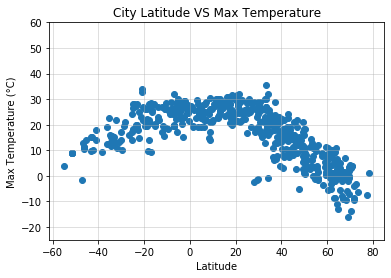

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate the Plot lat vs. Temp

plt.scatter(weather_df["Latitude"],weather_df["Max Temperature"] )


plt.ylim(-25,60)

# Chart title
plt.title("City Latitude VS Max Temperature")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Max Temperature (°C)")
# legend 

plt.grid(alpha=0.5)

# Show the Figure
plt.show()


# Save the Figure
plt.savefig("./LatVSTemp.png")

#### Latitude vs. Humidity Plot

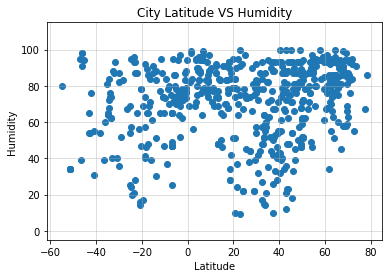

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate the Plot lat vs. Humidity

plt.scatter(weather_df["Latitude"],weather_df["Humidity"] )


plt.ylim(-5,115)

# Chart title
plt.title("City Latitude VS Humidity")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Humidity")
# legend 

plt.grid(alpha=0.5)

# Show the Figure
plt.show()


# Save the Figure
plt.savefig("./LatVSHum.png")

#### Latitude vs. Cloudiness Plot

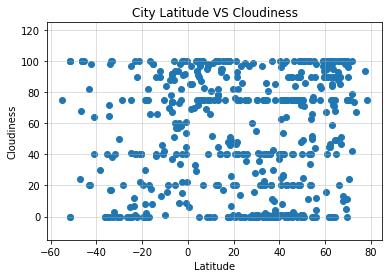

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate the Plot lat vs. Cloudiness

plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"] )


plt.ylim(-15,125)

# Chart title
plt.title("City Latitude VS Cloudiness")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Cloudiness")
# legend 

plt.grid(alpha=0.5)

# Show the Figure
plt.show()


# Save the Figure
plt.savefig("./LatVSCloud.png")

#### Latitude vs. Wind Speed Plot

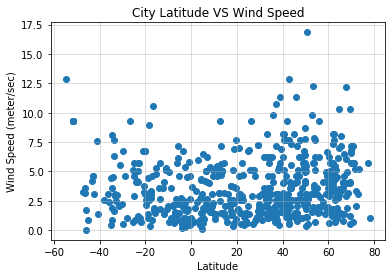

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate the Plot lat vs. Wind Speed

plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"] )


# Chart title
plt.title("City Latitude VS Wind Speed")
# x label
plt.xlabel("Latitude")
# y label
plt.ylabel("Wind Speed (meter/sec)")
# legend 

plt.grid(alpha=0.5)

# Show the Figure
plt.show()


# Save the Figure
plt.savefig("./LatVSWind.png")